In [1]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "4"


# آدرس فایل را به درستی تنظیم کنید
file_path = 'C:/Users/omidz/health/GeneExpression.2024-10-24.tsv'

# بارگذاری داده‌ها
gene_expression_data = pd.read_csv(file_path, sep='\t')

# نمایش چند ردیف از داده‌ها برای بررسی
print(gene_expression_data.head())


                                   Case      MYCL      MUC1    CDKN2A  \
0                      TARGET-20-PAWZLW -0.324200 -0.693270 -0.625082   
1  TARGET-20-PAYHFV-Sorted-non-leukemic -0.263630 -0.673539 -0.593864   
2                      TARGET-20-PAKRUP -0.308950 -0.682805 -0.579329   
3                      TARGET-40-PARJXU -0.323086 -0.647726  0.282745   
4                      TARGET-40-PARKAF -0.301255 -0.691313 -0.635892   

       NFIB     FGFR2     WWTR1       SMO     FGFR1     MECOM  ...      GAS7  \
0 -0.807782 -0.734493 -0.949618 -0.808640 -0.713402 -0.875245  ... -0.085265   
1 -0.807782 -0.729638 -0.947802 -0.748588  0.885043 -0.905656  ...  1.757275   
2 -0.807782 -0.735557 -0.957638 -0.730741 -0.043344 -0.912328  ...  4.962881   
3 -0.237569  1.545610  3.180541  0.646824  4.930401 -0.879374  ... -0.463772   
4  3.758523 -0.271039  0.549741  1.550541  0.302574 -0.840657  ... -0.437401   

        FES      JAK3      LCP1      VAV1     IKZF1      FLI1     CSF1R  \
0 -0.

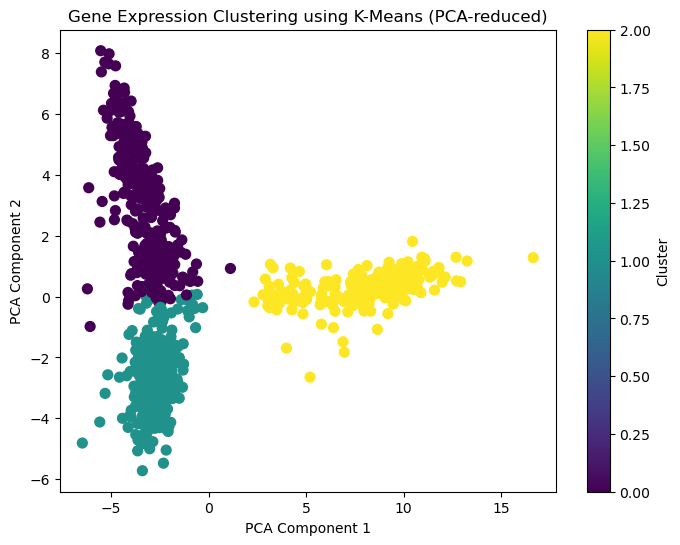

                                   Case      MYCL      MUC1    CDKN2A  \
0                      TARGET-20-PAWZLW -0.324200 -0.693270 -0.625082   
1  TARGET-20-PAYHFV-Sorted-non-leukemic -0.263630 -0.673539 -0.593864   
2                      TARGET-20-PAKRUP -0.308950 -0.682805 -0.579329   
3                      TARGET-40-PARJXU -0.323086 -0.647726  0.282745   
4                      TARGET-40-PARKAF -0.301255 -0.691313 -0.635892   

       NFIB     FGFR2     WWTR1       SMO     FGFR1     MECOM  ...       FES  \
0 -0.807782 -0.734493 -0.949618 -0.808640 -0.713402 -0.875245  ... -0.202263   
1 -0.807782 -0.729638 -0.947802 -0.748588  0.885043 -0.905656  ...  0.737140   
2 -0.807782 -0.735557 -0.957638 -0.730741 -0.043344 -0.912328  ...  3.299726   
3 -0.237569  1.545610  3.180541  0.646824  4.930401 -0.879374  ... -0.507432   
4  3.758523 -0.271039  0.549741  1.550541  0.302574 -0.840657  ... -0.387640   

       JAK3      LCP1      VAV1     IKZF1      FLI1     CSF1R       KLF4  \
0 -0

In [2]:
# کتابخانه‌های مورد نیاز
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# حذف ستون 'Case' که برای خوشه‌بندی نیازی به آن نداریم
gene_expression_clean = gene_expression_data.drop(columns=['Case'])

# استانداردسازی داده‌ها
scaler = StandardScaler()
gene_expression_scaled = scaler.fit_transform(gene_expression_clean)

# اجرای K-Means با ۳ خوشه
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # مقدار n_init را به 10 صریحاً تنظیم کنید

clusters = kmeans.fit_predict(gene_expression_scaled)

# اضافه کردن نتایج خوشه‌بندی به داده‌ها
gene_expression_data['Cluster'] = clusters

# کاهش ابعاد داده‌ها برای نمایش با استفاده از PCA
pca = PCA(n_components=2)  # کاهش به ۲ بعد
pca_result = pca.fit_transform(gene_expression_scaled)

# رسم نمودار خوشه‌ها
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Gene Expression Clustering using K-Means (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# نمایش چند ردیف ابتدایی از داده‌های خوشه‌بندی شده
print(gene_expression_data.head())


In [3]:
print(gene_expression_data['Cluster'].value_counts())


1    398
0    331
2    271
Name: Cluster, dtype: int64


In [4]:
cluster_means = gene_expression_data.groupby('Cluster').mean(numeric_only=True)
print(cluster_means)


             MYCL      MUC1    CDKN2A      NFIB     FGFR2     WWTR1       SMO  \
Cluster                                                                         
0       -0.080529 -0.211806 -0.255465 -0.246315 -0.223505 -0.181098 -0.424419   
1        0.260771  0.635251  0.613579  0.712821  0.670334  0.767237  0.800636   
2       -0.284618 -0.674251 -0.589097 -0.746024 -0.711487 -0.905598 -0.657455   

            FGFR1     MECOM      MLF1  ...      GAS7       FES      JAK3  \
Cluster                                ...                                 
0       -0.529304 -0.128349 -0.303390  ... -0.443530 -0.498351 -0.495688   
1        0.622351  0.592792  0.748601  ... -0.336240 -0.361322 -0.449939   
2       -0.267512 -0.713829 -0.728859  ...  1.035542  1.139337  1.266231   

             LCP1      VAV1     IKZF1      FLI1     CSF1R      KLF4      MAFB  
Cluster                                                                        
0       -0.490772 -0.522011 -0.513206 -0.482976 -0.40

In [5]:
# محاسبه میانگین بیان ژن‌ها برای هر خوشه
cluster_means = gene_expression_data.groupby('Cluster').mean(numeric_only=True)
# نمایش میانگین بیان ژن‌ها برای هر خوشه
print(cluster_means)

# شناسایی ژن‌هایی که بیشترین تغییرات را بین خوشه‌ها دارند
# محاسبه انحراف معیار برای هر ژن بین خوشه‌ها
cluster_std = cluster_means.std(axis=0).sort_values(ascending=False)

# نمایش 10 ژن با بیشترین تفاوت بین خوشه‌ها
print("Top 10 Genes with the highest variability across clusters:")
print(cluster_std.head(10))


             MYCL      MUC1    CDKN2A      NFIB     FGFR2     WWTR1       SMO  \
Cluster                                                                         
0       -0.080529 -0.211806 -0.255465 -0.246315 -0.223505 -0.181098 -0.424419   
1        0.260771  0.635251  0.613579  0.712821  0.670334  0.767237  0.800636   
2       -0.284618 -0.674251 -0.589097 -0.746024 -0.711487 -0.905598 -0.657455   

            FGFR1     MECOM      MLF1  ...      GAS7       FES      JAK3  \
Cluster                                ...                                 
0       -0.529304 -0.128349 -0.303390  ... -0.443530 -0.498351 -0.495688   
1        0.622351  0.592792  0.748601  ... -0.336240 -0.361322 -0.449939   
2       -0.267512 -0.713829 -0.728859  ...  1.035542  1.139337  1.266231   

             LCP1      VAV1     IKZF1      FLI1     CSF1R      KLF4      MAFB  
Cluster                                                                        
0       -0.490772 -0.522011 -0.513206 -0.482976 -0.40

In [6]:
# میانگین بیان ژن‌ها در هر خوشه را محاسبه می‌کنیم
cluster_means = gene_expression_data.groupby('Cluster').mean(numeric_only=True)
# نمایش ژن‌های کلیدی
key_genes = ['PTPRC', 'IKZF1', 'VAV1', 'FLI1', 'LCP1', 'RBM15', 'GNA11', 'CDH1', 'LYN', 'PTPRK']

# نمایش میانگین بیان ژن‌های کلیدی در هر خوشه
cluster_key_genes = cluster_means[key_genes]
print(cluster_key_genes)


            PTPRC     IKZF1      VAV1      FLI1      LCP1     RBM15     GNA11  \
Cluster                                                                         
0       -0.480448 -0.513206 -0.522011 -0.482976 -0.490772 -0.445877  0.894780   
1       -0.521331 -0.520239 -0.494301 -0.495766 -0.486428 -0.511011  0.028362   
2        1.352465  1.390872  1.363534  1.318007  1.313815  1.295083 -1.134539   

             CDH1       LYN     PTPRK  
Cluster                                
0        1.017210 -0.415769  0.976580  
1       -0.162237 -0.523334 -0.109343  
2       -1.004155  1.276408 -1.032213  


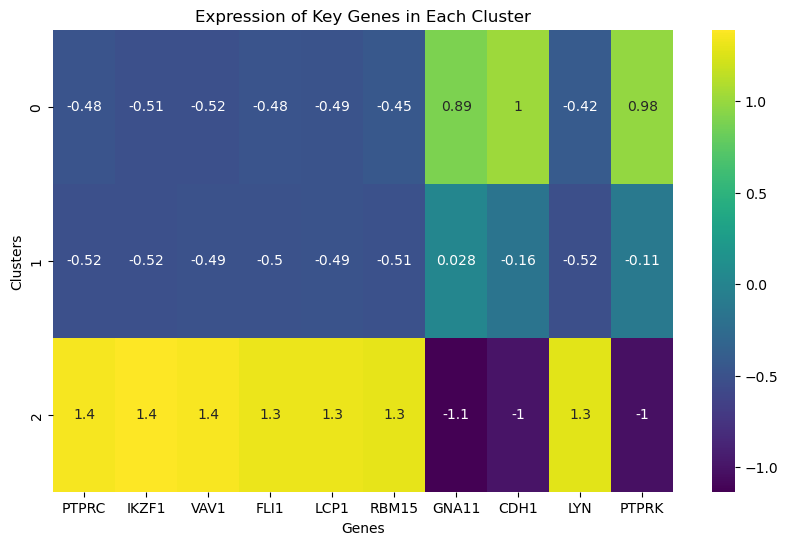

In [7]:
import matplotlib.pyplot as plt

# رسم نمودار حرارتی برای نمایش بیان ژن‌های کلیدی در هر خوشه
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_key_genes, annot=True, cmap='viridis')
plt.title('Expression of Key Genes in Each Cluster')
plt.xlabel('Genes')
plt.ylabel('Clusters')
plt.show()


In [8]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler

# بارگذاری فایل اصلی
file_path = 'C:/Users/omidz/health/GeneExpression.2024-10-24.tsv'
gene_expression_data = pd.read_csv(file_path, sep='\t')

# حذف ستون‌های غیرمرتبط (اگر ستون‌های خاصی برای تحلیل نیاز نیست)
# به جای 'Case' هر ستونی که غیرضروری است را قرار دهید
gene_expression_clean = gene_expression_data.drop(columns=['Case'])

# استانداردسازی داده‌ها
scaler = StandardScaler()
gene_expression_scaled = scaler.fit_transform(gene_expression_clean)

# اجرای K-Means برای خوشه‌بندی (تعداد خوشه‌ها را مشخص کنید، مثلاً 3)
# اجرای K-Means با n_init مشخص
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(gene_expression_scaled)


# اضافه کردن خوشه‌ها به داده‌ها
gene_expression_data['Cluster'] = clusters

# حالا می‌توانید داده‌های خوشه دوم را فیلتر کنید
cluster_2_data = gene_expression_data[gene_expression_data['Cluster'] == 2]

# ذخیره کردن داده‌های خوشه 2 در یک فایل جدید
cluster_2_data.to_csv('C:/Users/omidz/health/Cluster_2_GeneExpression.tsv', sep='\t', index=False)

print("داده‌های خوشه دوم با موفقیت ذخیره شدند!")


داده‌های خوشه دوم با موفقیت ذخیره شدند!


In [9]:
# کتابخانه‌های مورد نیاز
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# داده‌های شبیه‌سازی شده برای مثال
gene_expression_data = pd.DataFrame({
    "Gene1": np.random.rand(100),
    "Gene2": np.random.rand(100),
    "Gene3": np.random.rand(100),
    "Gene4": np.random.rand(100)
})

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gene_expression_data)

# اجرای K-Means با 3 خوشه
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# اضافه کردن برچسب‌های خوشه‌ها به داده‌ها
gene_expression_data['Cluster'] = clusters

# مقایسه میانگین بیان ژن‌ها بین خوشه‌ها
cluster_means = gene_expression_data.groupby('Cluster').mean()

print("Cluster Means:")
print(cluster_means)


C:\Users\omidz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\omidz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Means:
            Gene1     Gene2     Gene3     Gene4
Cluster                                        
0        0.671011  0.698358  0.783148  0.386295
1        0.367643  0.457529  0.448518  0.749927
2        0.461881  0.406739  0.324407  0.230038


#part neural network

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 512)               51712     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0     

25/25 [==============================] - 0s 11ms/step - loss: 0.8918 - val_loss: 1.6009
Epoch 63/200
25/25 [==============================] - 0s 11ms/step - loss: 0.8882 - val_loss: 1.5996
Epoch 64/200
25/25 [==============================] - 0s 10ms/step - loss: 0.8842 - val_loss: 1.5949
Epoch 65/200
25/25 [==============================] - 0s 12ms/step - loss: 0.8797 - val_loss: 1.5907
Epoch 66/200
25/25 [==============================] - 0s 12ms/step - loss: 0.8782 - val_loss: 1.5916
Epoch 67/200
25/25 [==============================] - 0s 11ms/step - loss: 0.8738 - val_loss: 1.5850
Epoch 68/200
25/25 [==============================] - 0s 11ms/step - loss: 0.8705 - val_loss: 1.5809
Epoch 69/200
25/25 [==============================] - 0s 10ms/step - loss: 0.8679 - val_loss: 1.5800
Epoch 70/200
25/25 [==============================] - 0s 12ms/step - loss: 0.8644 - val_loss: 1.5764
Epoch 71/200
25/25 [==============================] - 0s 11ms/step - loss: 0.8605 - val_loss: 1.5731
Epo

Epoch 143/200
25/25 [==============================] - 0s 15ms/step - loss: 0.7551 - val_loss: 1.4713
Epoch 144/200
25/25 [==============================] - 0s 12ms/step - loss: 0.7534 - val_loss: 1.4711
Epoch 145/200
25/25 [==============================] - 0s 12ms/step - loss: 0.7536 - val_loss: 1.4721
Epoch 146/200
25/25 [==============================] - 0s 11ms/step - loss: 0.7524 - val_loss: 1.4700
Epoch 147/200
25/25 [==============================] - 0s 11ms/step - loss: 0.7513 - val_loss: 1.4692
Epoch 148/200
25/25 [==============================] - 0s 15ms/step - loss: 0.7514 - val_loss: 1.4693
Epoch 149/200
25/25 [==============================] - 0s 14ms/step - loss: 0.7501 - val_loss: 1.4680
Epoch 150/200
25/25 [==============================] - 0s 10ms/step - loss: 0.7512 - val_loss: 1.4687
Epoch 151/200
25/25 [==============================] - 0s 14ms/step - loss: 0.7499 - val_loss: 1.4680
Epoch 152/200
25/25 [==============================] - 0s 11ms/step - loss: 0.7491

C:\Users\omidz\AppData\Local\Temp\ipykernel_5236\1048558642.py:78: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50, cmap='viridis')


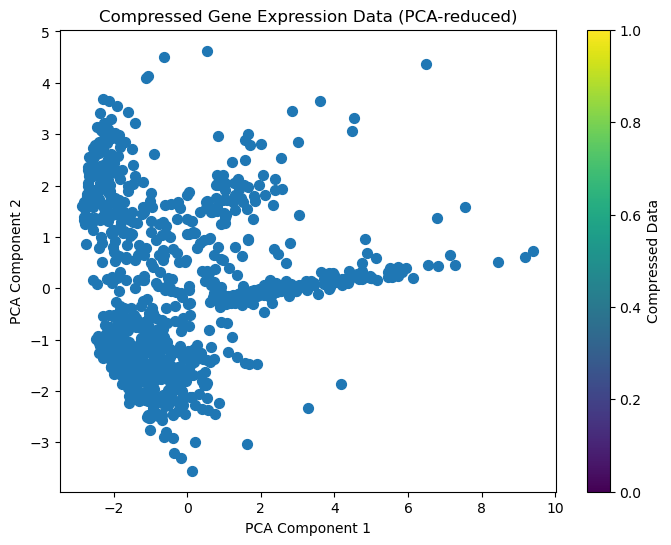

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# 1. **بارگذاری داده‌ها**
file_path = 'C:/Users/omidz/health/GeneExpression.2024-10-24.tsv'
gene_expression_data = pd.read_csv(file_path, sep='\t')

# حذف ستون 'Case' و آماده‌سازی داده‌ها برای شبکه عصبی
gene_expression_clean = gene_expression_data.drop(columns=['Case'])

# 2. **استانداردسازی داده‌ها**
scaler = StandardScaler()
gene_expression_scaled = scaler.fit_transform(gene_expression_clean)

# 3. **ساخت مدل خودرمزگذار (Autoencoder) با Regularization و Dropout**
input_dim = gene_expression_scaled.shape[1]  # تعداد ویژگی‌ها (ژن‌ها)

# لایه ورودی
input_layer = Input(shape=(input_dim,))

# بخش کدگذار (Encoder) با L2 Regularization و Dropout بیشتر
encoder = Dense(512, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
encoder = Dropout(0.4)(encoder)  # Dropout 40%
encoder = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(encoder)
encoder = Dropout(0.4)(encoder)
encoder = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(encoder)
encoder = Dropout(0.4)(encoder)
encoder = Dense(64, activation="relu")(encoder)

# بخش رمزگشا (Decoder)
decoder = Dense(128, activation="relu")(encoder)
decoder = Dense(256, activation="relu")(decoder)
decoder = Dense(512, activation="relu")(decoder)
output_layer = Dense(input_dim, activation="sigmoid")(decoder)

# ساخت مدل
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# کامپایل مدل با نرخ یادگیری کمتر برای دقت بهتر
autoencoder.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')

# نمایش ساختار مدل
autoencoder.summary()

# 4. **استفاده از Early Stopping برای جلوگیری از آموزش بیش از حد**
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 5. **آموزش مدل**
history = autoencoder.fit(gene_expression_scaled, gene_expression_scaled, 
                          epochs=200, 
                          batch_size=32, 
                          validation_split=0.2,
                          callbacks=[early_stopping])

# 6. **استخراج ویژگی‌های فشرده‌شده**
# ساخت مدل کدگذار
encoder_model = Model(inputs=input_layer, outputs=encoder)

# استخراج داده‌های فشرده‌شده
compressed_data = encoder_model.predict(gene_expression_scaled)

# 7. **کاهش ابعاد و تجسم داده‌های فشرده‌شده**
# استفاده از PCA برای تجسم داده‌های فشرده‌شده
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compressed_data)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50, cmap='viridis')
plt.title('Compressed Gene Expression Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Compressed Data')
plt.show()


In [11]:
# استخراج ویژگی‌های فشرده‌شده از بخش کدگذار (Encoder)
compressed_data = encoder_model.predict(gene_expression_scaled)

# نمایش شکل داده‌های فشرده‌شده
print(compressed_data.shape)


32/32 [==============================] - 0s 6ms/step
(1000, 64)


C:\Users\omidz\AppData\Local\Temp\ipykernel_5236\1459870250.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50, cmap='viridis')


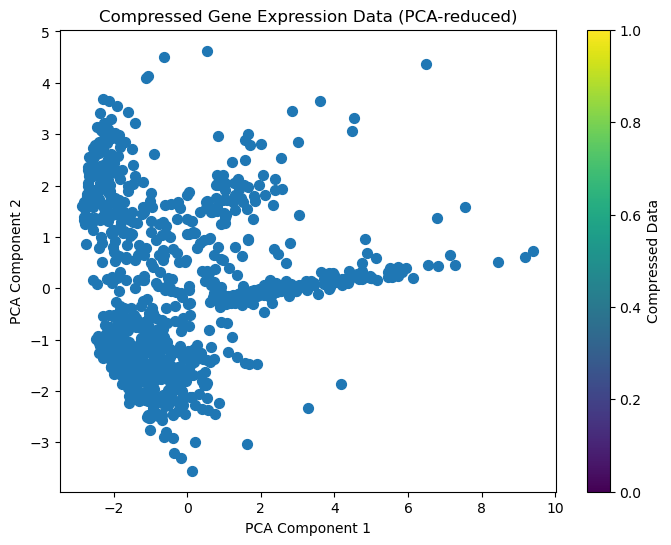

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# کاهش ابعاد به 2 بعد با PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(compressed_data)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50, cmap='viridis')
plt.title('Compressed Gene Expression Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Compressed Data')
plt.show()


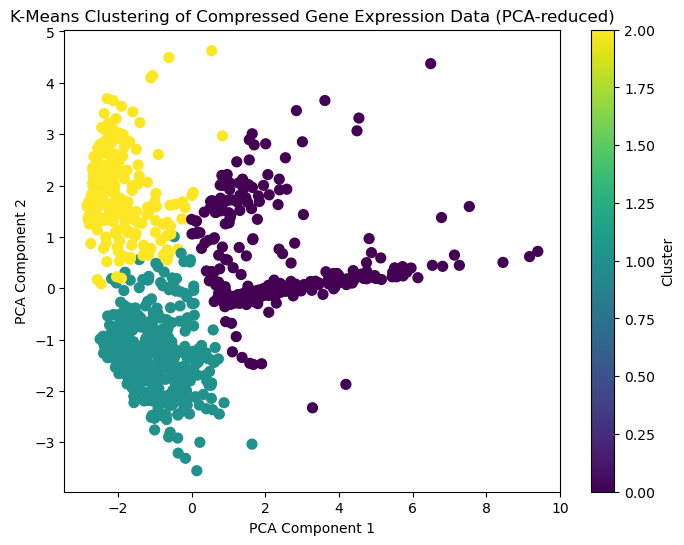

In [13]:
from sklearn.cluster import KMeans

# خوشه‌بندی با استفاده از K-Means (3 خوشه) و مقدار صریح n_init
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(compressed_data)

# افزودن برچسب خوشه‌ها به داده‌های فشرده‌شده
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering of Compressed Gene Expression Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [14]:
# افزودن نتایج خوشه‌بندی به داده‌ها
gene_expression_data['Cluster'] = clusters

# محاسبه میانگین بیان ژن‌ها برای هر خوشه
cluster_means = gene_expression_data.groupby('Cluster').mean(numeric_only=True)
print(cluster_means)


             MYCL      MUC1    CDKN2A      NFIB     FGFR2     WWTR1       SMO  \
Cluster                                                                         
0       -0.200233 -0.551812 -0.331674 -0.472154 -0.500984 -0.628120 -0.510346   
1        0.262146  0.612484  0.585603  0.580154  0.610142  0.763188  0.753270   
2       -0.138334 -0.176527 -0.510964 -0.255466 -0.260942 -0.323826 -0.511061   

            FGFR1     MECOM      MLF1  ...      GAS7       FES      JAK3  \
Cluster                                ...                                 
0       -0.304740 -0.613823 -0.529653  ...  0.597022  0.683580  0.767337   
1        0.569734  0.602342  0.751081  ... -0.326782 -0.353691 -0.438710   
2       -0.528462 -0.049343 -0.473263  ... -0.434338 -0.535418 -0.523419   

             LCP1      VAV1     IKZF1      FLI1     CSF1R      KLF4      MAFB  
Cluster                                                                        
0        0.805368  0.821959  0.851456  0.811449  0.24

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# تقسیم داده‌ها به مجموعه‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(compressed_data, clusters, test_size=0.2, random_state=42)

# تبدیل برچسب‌ها به فرمت one-hot encoding
lb = LabelBinarizer()
y_train_ohe = lb.fit_transform(y_train)
y_test_ohe = lb.transform(y_test)

# ساخت مدل شبکه عصبی عمیق
model = Sequential()

# لایه ورودی و لایه‌های مخفی
model.add(Dense(512, activation='relu', input_shape=(compressed_data.shape[1],)))
model.add(Dropout(0.3))  # Dropout برای جلوگیری از overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# لایه خروجی با استفاده از softmax برای دسته‌بندی
model.add(Dense(3, activation='softmax'))  # 3 کلاس به عنوان خوشه‌ها

# کامپایل مدل
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
history = model.fit(X_train, y_train_ohe, epochs=100, batch_size=32, validation_data=(X_test, y_test_ohe))

# ارزیابی مدل
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)
print(f"Test accuracy: {test_acc}")


Epoch 1/100
25/25 [==============================] - 2s 25ms/step - loss: 0.4420 - accuracy: 0.8400 - val_loss: 0.0807 - val_accuracy: 0.9750
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1980 - accuracy: 0.9350 - val_loss: 0.1001 - val_accuracy: 0.9750
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1870 - accuracy: 0.9350 - val_loss: 0.0579 - val_accuracy: 0.9750
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1446 - accuracy: 0.9475 - val_loss: 0.0476 - val_accuracy: 0.9850
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1080 - accuracy: 0.9613 - val_loss: 0.0495 - val_accuracy: 0.9800
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1084 - accuracy: 0.9563 - val_loss: 0.0655 - val_accuracy: 0.9800
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.1016 - accuracy: 0.9575 - val_loss: 0.0426 - val_accuracy: 0.9850
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss: 0.0325 - val_accuracy: 0.9800
Epoch 60/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0366 - val_accuracy: 0.9850
Epoch 61/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.0399 - val_accuracy: 0.9800
Epoch 62/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.9962 - val_loss: 0.0313 - val_accuracy: 0.9950
Epoch 63/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0443 - accuracy: 0.9837 - val_loss: 0.0217 - val_accuracy: 0.9950
Epoch 64/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0524 - accuracy: 0.9825 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 65/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9862 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 

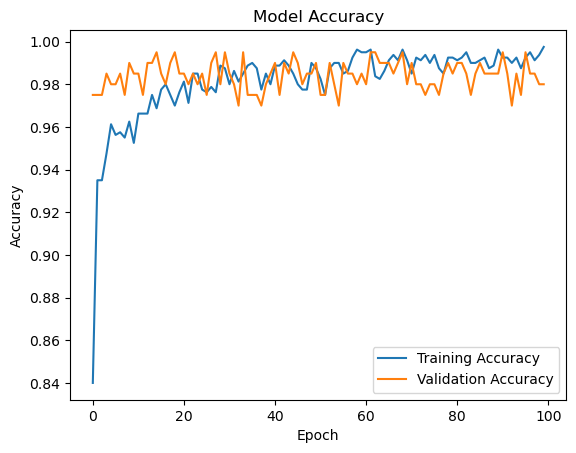

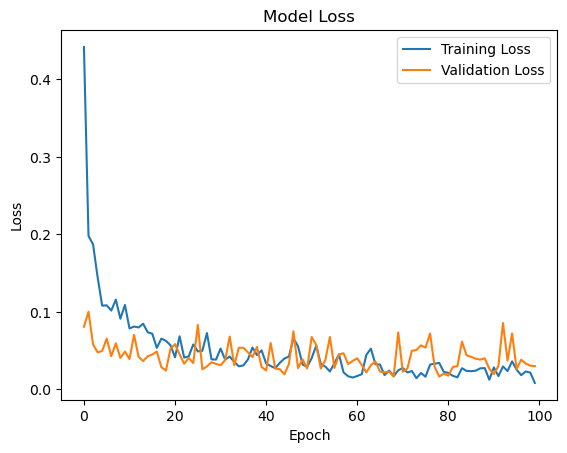

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\omidz\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\omidz\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\omidz\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\omidz\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [16]:
import matplotlib.pyplot as plt

# رسم نمودار دقت مدل
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# رسم نمودار خطای مدل
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
